# Simple Neuron

An artificial neuron is a mathematical function conceived as a model of biological neurons, a neural network.

The artificial neuron:

1. receives one or more inputs
2. sums them to produce an output (usually each input is separately weighted, but not in this simple case)
3. the sum is passed through a non-linear function known as an activation function

Such function usually has a sigmoid shape, but they may also take the form of other non-linear functions.

In [1]:

import operator

class myNeuron:
    
    def __init__(self, thres, op='>='):    
        self.thres = thres
        ops = {'>': operator.gt,
               '<': operator.lt,
               '>=': operator.ge,
               '<=': operator.le,
               '==': operator.eq}
        
        self.op = ops[op]
        
    def fire(self,x):
        s = np.sum(x)  
        if self.op(s,self.thres):
            return 1
        else:
            return 0


**NOTE** that the 'operators' part is totally skippable. It is just there because you may want to conceive a neuron that activate if the sum of inputs is *below*, *equal to* or *strictly lower/bigger* than the threshold. Such neurons in fact do exists in nature (inhibitory neurons).

We can now test our new class ```myNeuron``` and test whether it fires or not in different situations:

In [2]:
n = myNeuron(5) # create a node with a threshold of 5

n.fire([2,1]) # should NOT fire
n.fire([2,3]) # should fire
n.fire([6,8]) # should fire

1

# The Perceptron

In machine learning, the perceptron is an algorithm for *supervised learning* of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

Let's briefly discuss the methods included in ```myPerceptron```.

<br>

The <b>activation function</b> method, is the before mentioned function which 'decides' whether the neuron fires or not (or in other words whether the answer of the Perceptron is 0 or 1). The Perceptron use a <i>step function</i> (the simplest activation function) which returns 1 if the received input is above 0 and 0 otherwise - like the neuron from before, but with 0 as threshold.

The <b>predict</b> method make, of course, predictions. Given the current set of weights and bias of the Perceptron, it takes as an input a list of features and try to predict a target value. In fact, <tt>z</tt> is the weighted sum of the input values it receives (namely, the <i>dot product</i> between weights and input features). Then, <tt>z</tt> is passed through the activation function to return a prediction, which is appended to predictions array <tt>pred</tt>.

The <b>train</b> method is the most peculiar one. At first, it assigns randomly a bias (one) and a set of weights (equal to the number of features of the dataset). Then a couple of loops control the training process. Untill convergence is met (the Perceptron produce 0 errors) or the maximum number of epochs is reached, the Perceptron takes every set of features, makes a weighted sum, passes the output through the activation function and then compares the result with the actual corresponding target value. If the error is ≠ 0 the magic happens: both the weights and the bias are changed, according to the set <i>learning rate</i> (the <tt>lr</tt> parameter). Setting a good learning rate is crucial: small <tt>lr</tt> means little chance of improving the accuracy in the next epoch, while a too big <tt>lr</tt> is too rough and also means little to no chance of converging over epochs. Also remember the bias is unique, while the weights are as many as the features of your dataset. At the end of an epoch (each cycle) the loss function is computed, to evaluate the overall error of the Perceptron. Similarly to what happens with activation functions, one can choose different kinds of loss functions. In this case, as a measure of loss we just consider the absolute difference between the actual target values Y and the prediction of the Perceptron at its current state. It is useful to store info about loss at each epochs, so later we can plot the loss curve, that shows how rapidly we got to convergence.

In [3]:
import numpy as np


class myPerceptron:

    def activaction_function(self, z):  # step function

        if z >= 0:
            return 1
        else:
            return 0

    def predict(self, X):

        pred = list()

        for i in range(X.shape[0]):
            z = np.dot(self.w, X[i, :]) + self.b
            pred.append(self.activaction_function(z))
        return np.array(pred)

    def train(self, X, y, lr=.01, max_ep=1000, verbose=False):

        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand()

        self.cost = list()
        epoch = 0
        converged = False

        while not converged and epoch <= max_ep:

            for i in range(len(y)):

                z = np.dot(self.w, X[i, :]) + self.b
                a = self.activaction_function(z)

                error = y[i] - a

                if error != 0:
                    self.w += lr * error * X[i, :]
                    self.b += lr * error

            epoch += 1
            loss = sum(abs(y - self.predict(X)))
            self.cost.append(loss)
            converged = loss == 0

            if verbose == True:
                print('Epoch: %d \t Loss: %1.2f' % (epoch, loss))

            if converged: print('\nIt converged!')
            if epoch == max_ep: print('\nEpochs limit reached!')


We can now test our Perceptron with a dataset. We use the the toy dataset ```iris``` available in the ```sklearn``` package. 

Also, we plot in the end the loss at each cycle, to see how it becomes lower and lower (namely, it's *converging*).


Epochs limit reached!

Accuracy: 96.0


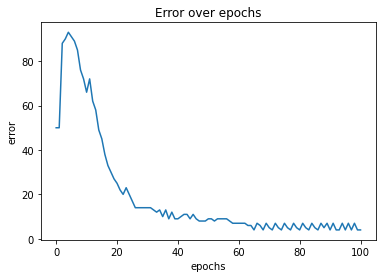

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:100, 0:2]
y = iris.target[:100]

# shuffle dataset
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
X = X[idx, :]
y = y[idx]

perc = myPerceptron()
perc.train(X, y, lr=.001, max_ep=100)

pred = perc.predict(X)
accuracy = 100 * sum(y == pred) / float(len(y))
print('\nAccuracy: %1.1f' % accuracy)

plt.plot(perc.cost)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Error over epochs')
plt.show()

# First Neural Network

In [13]:
import numpy as np


class myNN:

    def __init__(self):
        self.w1 = np.random.rand()
        self.w2 = np.random.rand()

        self.b1 = np.random.rand()
        self.b2 = np.random.rand()

    def act(self, z):
        return 1 / (1 + np.exp(-z))  # sigmoid

    def cutoff(self, z):
        if z > 0.5:
            return 1
        else:
            return 0

    def train(self, x, y, lr=.01, max_e=1000):

        self.loss = []

        for e in range(max_e):

            loss_e = []

            for i in range(len(y)):
                """ Forward """

                """ x → +b1 → [z1|a1] → +b2 → [z2|a2] → L """

                # z1 = x    * w1      + b1
                z1 = x[i] * self.w1 + self.b1
                #print('z1:',z1)
                # a1 = f(z1)
                a1 = self.act(z1)

                # z2 = a1 * w2      + b2
                z2 = a1 * self.w2 + self.b2
                # a2 = f(z2)
                a2 = self.act(z2)

                yhat = a2  # output

                """ Backward """

                loss_e.append((yhat - y[i]) ** 2)

                dL_yhat = 2 * (yhat - y[i])
                dyhat_z2 = self.act(z2) * (1 - self.act(z2))
                dz2_w2 = a1
                dL_w2 = dL_yhat * dyhat_z2 * dz2_w2

                dz2_a1 = self.w2
                da1_z1 = self.act(z1) * (1 - self.act(z1))
                dz1_w1 = x[i]

                dL_w1 = dL_yhat * dyhat_z2 * dz2_a1 * da1_z1 * dz1_w1

                """ Update parameters """

                self.w2 -= lr * dL_w2
                self.w1 -= lr * dL_w1

                self.b2 -= lr * (dL_yhat * dyhat_z2)
                self.b1 -= lr * (dL_yhat * dyhat_z2 * dz2_a1 * da1_z1)

            self.loss.append(np.mean(loss_e))

    def predict(self, x):

        preds = []

        for i in range(len(x)):
            z1 = x[i] * self.w1 + self.b1
            a1 = self.act(z1)
            z2 = a1 * self.w2 + self.b2
            yhat = self.act(z2)

            out = self.cutoff(yhat)
            preds.append(out)

        return preds



Accuracy: 80.0


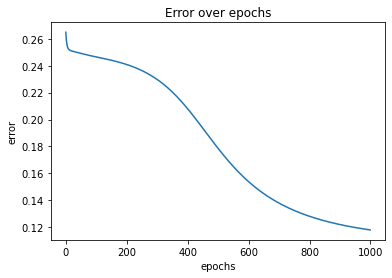

In [25]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:100, 1]
y = iris.target[:100]

nn = myNN()

nn.train(X, y, lr=.01, max_e=1000)

pred = nn.predict(X)

accuracy = 100 * sum(y == pred) / float(len(y))
print('\nAccuracy: %1.1f' % accuracy)

plt.plot(nn.loss)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Error over epochs')
plt.show()
